In [1020]:
import pandas as pd

# Import Heart Attack Data

In [1021]:
ha_costs_df = pd.read_csv ("/Users/nehasawhney/desktop/PROJECT_DSEmodule/data/mmd_heart_attack_data.csv")

## Examine Heart Attack Data

In [1022]:
ha_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656 entries, 0 to 2655
Data columns (total 17 columns):
year                   2656 non-null int64
geography              2656 non-null object
measure                2656 non-null object
adjustment             2656 non-null object
analysis               2656 non-null object
domain                 2656 non-null object
condition              2656 non-null object
primary_sex            2656 non-null object
primary_age            2656 non-null object
primary_dual           2656 non-null object
fips                   2656 non-null int64
county                 2656 non-null object
state                  2656 non-null object
urban                  2656 non-null object
primary_race           2656 non-null object
primary_denominator    2656 non-null object
analysis_value         2656 non-null int64
dtypes: int64(3), object(14)
memory usage: 352.8+ KB


In [1023]:
ha_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615


In [1024]:
ha_costs_df.tail(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2654,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72127,San Juan Municipio,PUERTO RICO,Urban,All,undefined,36599
2655,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,72139,Trujillo Alto Municipio,PUERTO RICO,Urban,All,undefined,26676


## Clean Heart Attack Data

In [1025]:
ha_costs_df_onlyTN = ha_costs_df.loc[ha_costs_df["state"] == "TENNESSEE"]

In [1026]:
ha_costs_df_onlyTN.head()

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661
2032,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47005,Benton County,TENNESSEE,Rural,All,undefined,44423
2033,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47007,Bledsoe County,TENNESSEE,Rural,All,undefined,41240
2034,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47009,Blount County,TENNESSEE,Urban,All,undefined,38968


In [1027]:
ha_costs_df_onlyTN.shape

(91, 17)

In [1028]:
ha_costs_df_onlyTN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 2030 to 2120
Data columns (total 17 columns):
year                   91 non-null int64
geography              91 non-null object
measure                91 non-null object
adjustment             91 non-null object
analysis               91 non-null object
domain                 91 non-null object
condition              91 non-null object
primary_sex            91 non-null object
primary_age            91 non-null object
primary_dual           91 non-null object
fips                   91 non-null int64
county                 91 non-null object
state                  91 non-null object
urban                  91 non-null object
primary_race           91 non-null object
primary_denominator    91 non-null object
analysis_value         91 non-null int64
dtypes: int64(3), object(14)
memory usage: 12.8+ KB


In [1029]:
ha_costs_df_onlyTN["county"].unique()

array(['Anderson County', 'Bedford County', 'Benton County',
       'Bledsoe County', 'Blount County', 'Bradley County',
       'Campbell County', 'Cannon County', 'Carroll County',
       'Carter County', 'Cheatham County', 'Chester County',
       'Claiborne County', 'Clay County', 'Cocke County', 'Coffee County',
       'Crockett County', 'Cumberland County', 'Davidson County',
       'Decatur County', 'DeKalb County', 'Dickson County', 'Dyer County',
       'Fayette County', 'Fentress County', 'Franklin County',
       'Gibson County', 'Giles County', 'Grainger County',
       'Greene County', 'Grundy County', 'Hamblen County',
       'Hamilton County', 'Hardeman County', 'Hardin County',
       'Hawkins County', 'Haywood County', 'Henderson County',
       'Henry County', 'Hickman County', 'Houston County',
       'Humphreys County', 'Jackson County', 'Jefferson County',
       'Johnson County', 'Knox County', 'Lake County',
       'Lauderdale County', 'Lawrence County', 'Lewis Co

In [1030]:
UniqueCounties_ha_costs_df_onlyTN = ha_costs_df_onlyTN["county"].unique()

In [1031]:
UniqueCounties_ha_costs_df_onlyTN.shape

(91,)

### Counting Urban and Rural Counties and studying cost differences between them

In [1032]:
# The next one is a more easy method than the one below
ha_costs_df_onlyTN.groupby("urban")["urban"].count()

urban
Rural    53
Urban    38
Name: urban, dtype: int64

In [1033]:
ha_costs_df_onlyTN.urban.value_counts()

Rural    53
Urban    38
Name: urban, dtype: int64

In [1034]:
# One way is to visualize the differences
from matplotlib import pyplot as plt

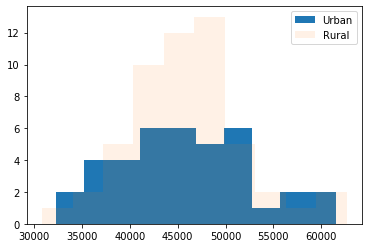

In [1035]:
plt.hist(ha_costs_df_onlyTN.analysis_value[ha_costs_df_onlyTN.urban == "Urban"], label ="Urban")
plt.hist(ha_costs_df_onlyTN.analysis_value[ha_costs_df_onlyTN.urban == "Rural"], label = "Rural", alpha = 0.1)
plt.legend()
plt.show()

# Import Cancer Data

In [1036]:
cancer_costs_df = pd.read_csv("/Users/nehasawhney/desktop/PROJECT_DSEmodule/data/mmd_cancer_data.csv")

## Examine Cancer Data

In [1037]:
cancer_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151


In [1038]:
cancer_costs_df.tail(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
3163,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72151,Yabucoa Municipio,PUERTO RICO,Urban,All,undefined,8008
3164,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,72153,Yauco Municipio,PUERTO RICO,Urban,All,undefined,11171


In [1039]:
cancer_costs_df.shape

(3165, 17)

## Clean Cancer Data

In [1040]:
cancer_costs_df_OnlyTN = cancer_costs_df.loc[cancer_costs_df["state"]=="TENNESSEE"]

In [1041]:
cancer_costs_df_OnlyTN.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219


In [1042]:
cancer_costs_df_OnlyTN.shape

(95, 17)

### Counting Urban and Rural Counties and studying cost differences between them

In [1043]:
UniqueCounties_cancer_costs_df_OnlyTN = cancer_costs_df_OnlyTN["county"].unique()

In [1044]:
UniqueCounties_cancer_costs_df_OnlyTN

array(['Anderson County', 'Bedford County', 'Benton County',
       'Bledsoe County', 'Blount County', 'Bradley County',
       'Campbell County', 'Cannon County', 'Carroll County',
       'Carter County', 'Cheatham County', 'Chester County',
       'Claiborne County', 'Clay County', 'Cocke County', 'Coffee County',
       'Crockett County', 'Cumberland County', 'Davidson County',
       'Decatur County', 'DeKalb County', 'Dickson County', 'Dyer County',
       'Fayette County', 'Fentress County', 'Franklin County',
       'Gibson County', 'Giles County', 'Grainger County',
       'Greene County', 'Grundy County', 'Hamblen County',
       'Hamilton County', 'Hancock County', 'Hardeman County',
       'Hardin County', 'Hawkins County', 'Haywood County',
       'Henderson County', 'Henry County', 'Hickman County',
       'Houston County', 'Humphreys County', 'Jackson County',
       'Jefferson County', 'Johnson County', 'Knox County', 'Lake County',
       'Lauderdale County', 'Lawrence 

In [1045]:
UniqueCounties_cancer_costs_df_OnlyTN.shape

(95,)

# Comparing "counties" in two different databases

In [1046]:
cancer_costs_df_OnlyTN.county

2396      Anderson County
2397       Bedford County
2398        Benton County
2399       Bledsoe County
2400        Blount County
2401       Bradley County
2402      Campbell County
2403        Cannon County
2404       Carroll County
2405        Carter County
2406      Cheatham County
2407       Chester County
2408     Claiborne County
2409          Clay County
2410         Cocke County
2411        Coffee County
2412      Crockett County
2413    Cumberland County
2414      Davidson County
2415       Decatur County
2416        DeKalb County
2417       Dickson County
2418          Dyer County
2419       Fayette County
2420      Fentress County
2421      Franklin County
2422        Gibson County
2423         Giles County
2424      Grainger County
2425        Greene County
              ...        
2461         Obion County
2462       Overton County
2463         Perry County
2464       Pickett County
2465          Polk County
2466        Putnam County
2467          Rhea County
2468        

In [1047]:
ha_costs_df_onlyTN.county

2030      Anderson County
2031       Bedford County
2032        Benton County
2033       Bledsoe County
2034        Blount County
2035       Bradley County
2036      Campbell County
2037        Cannon County
2038       Carroll County
2039        Carter County
2040      Cheatham County
2041       Chester County
2042     Claiborne County
2043          Clay County
2044         Cocke County
2045        Coffee County
2046      Crockett County
2047    Cumberland County
2048      Davidson County
2049       Decatur County
2050        DeKalb County
2051       Dickson County
2052          Dyer County
2053       Fayette County
2054      Fentress County
2055      Franklin County
2056        Gibson County
2057         Giles County
2058      Grainger County
2059        Greene County
              ...        
2091    Montgomery County
2092        Morgan County
2093         Obion County
2094       Overton County
2095         Perry County
2096          Polk County
2097        Putnam County
2098        

In [1048]:
# we can create a list of counties in each dataset and use the set difference() method
cancer_counties = list(cancer_costs_df_OnlyTN.county.unique())
ha_counties = list(ha_costs_df_onlyTN.county.unique())

list(set(cancer_counties).difference(ha_counties))

['Van Buren County', 'Pickett County', 'Hancock County', 'Moore County']

# Cost analysis for Cancer Data

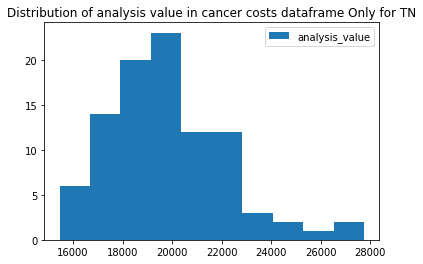

In [1049]:
# This is a visual method; a better method will follow.
plt.hist(cancer_costs_df_OnlyTN.analysis_value, label = "analysis_value")
plt.title("Distribution of analysis value in cancer costs dataframe Only for TN")
plt.legend()
plt.show()

In [1050]:
# This is a better method to examine data statistics
cancer_costs_df_OnlyTN.analysis_value.describe()

count       95.000000
mean     19757.894737
std       2436.304533
min      15454.000000
25%      18103.500000
50%      19563.000000
75%      21153.000000
max      27740.000000
Name: analysis_value, dtype: float64

# Import IRS Data

In [1051]:
income_df = pd.read_csv("/Users/nehasawhney/desktop/PROJECT_DSEmodule/data/irs_county_2016.csv")

## Examine IRS Data

In [1052]:
income_df.shape

(25536, 148)

In [1053]:
income_df.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152


## Clean IRS Data

In [1054]:
income_df_OnlyTN = income_df.loc[income_df["STATE"]=="TN"]

In [1055]:
income_df_OnlyTN.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510
19754,47,TN,0,Tennessee,3,717430,398720,115040,189290,341750,...,449870,461060,0,0,0,0,63270,70761,635450,1870568
19755,47,TN,0,Tennessee,4,759340,355970,217710,159890,347430,...,629080,1669328,110,100,0,0,104290,176690,646420,1783890
19756,47,TN,0,Tennessee,5,396810,128390,215890,42240,198820,...,382580,2135577,30,29,0,0,87440,220372,302390,849648


In [1056]:
income_df_OnlyTN.tail()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
20515,47,TN,189,Wilson County,4,14400,7130,4050,2610,6520,...,12340,34654,0,0,0,0,2090,4150,12140,31712
20516,47,TN,189,Wilson County,5,9330,2890,5160,960,4600,...,9010,50591,0,0,0,0,2080,5356,7100,19970
20517,47,TN,189,Wilson County,6,7160,1060,5630,380,3560,...,7110,61964,0,0,0,0,1710,5743,5290,17041
20518,47,TN,189,Wilson County,7,10350,780,9260,240,5330,...,10330,190229,60,13,0,0,3810,19921,6270,24591
20519,47,TN,189,Wilson County,8,2370,180,2130,50,1700,...,2370,230759,1160,1817,1080,3775,1260,39698,880,9411


In [1057]:
income_df_OnlyTN.shape

(768, 148)

### Keep only required columns

In [1058]:
SelectedColumns_income_df_OnlyTN = income_df_OnlyTN[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

In [1059]:
SelectedColumns_income_df_OnlyTN.head()

,STATE,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,N2,NUMDEP,ELDERLY,A00100,N02650,A02650,N02300,A02300
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


### Rename column names

In [1060]:
OldColumnNames = ['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']

In [1061]:
NewColumnNames = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

In [1062]:
Final_CleanData_income = SelectedColumns_income_df_OnlyTN.rename({'STATE': 'state', 'COUNTYNAME':'county', 'agi_stub': 'income_bucket', 'N1':'return_count', 'mars1':'single_returns', 'MARS2': 'joint_returns', 'MARS4': 'head_of_house_returns', 'N2': 'exemptions', 'NUMDEP': 'dependents', 'ELDERLY': 'elderly', 'A00100': 'agi', 'N02650': 'returns_with_total_inc', 'A02650': 'total_inc_amt', 'N02300': 'returns_with_unemployment', 'A02300': 'unemployment_comp' }, axis='columns')

In [1063]:
Final_CleanData_income.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


### Replace with Income Dictionary 

In [1064]:
Final_CleanData_income.income_bucket.unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [1065]:
income_dict = {0:"Total",
               1:'Under $1', 
               2:'Between 1 and $10,000', 
               3:'Between 10,000 and $25,000', 
               4:'Between 25,000 and $50,000', 
               5:'Between 50,000 and $75,000', 
               6:'Between 75,000 and $100,000', 
               7:'Between 100,000 and $200,000', 
               8:'$200,000 or more' }

In [1066]:
Final_CleanData_income.income_bucket = Final_CleanData_income.income_bucket.replace(income_dict)

In [1067]:
Final_CleanData_income.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,"Between 10,000 and $25,000",717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,"Between 25,000 and $50,000",759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,"Between 50,000 and $75,000",396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


# Groupby County and perform aggregation

In [1068]:
# "Sum" of data for each county
SumForCounty = Final_CleanData_income.groupby("county").sum()

In [1069]:
SumForCounty.head()

,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
county,,,,,,,,,,,,
Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [1070]:
income_county_agg = SumForCounty.reset_index()

In [1071]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


# Create a new column using a list

In [1072]:
avg_inc_list = []
for i in range(len(income_county_agg)) :
    income = 1000 * income_county_agg.total_inc_amt[i]
    count = income_county_agg.return_count[i]
    new_value = round(income/count)
    avg_inc_list.append(new_value)
print(avg_inc_list)

income_county_agg["avg_income"] = avg_inc_list
income_county_agg.head()

[53382.0, 47128.0, 41297.0, 39744.0, 56786.0, 48623.0, 41813.0, 44955.0, 42632.0, 40318.0, 55352.0, 43147.0, 41508.0, 35424.0, 36106.0, 48847.0, 43052.0, 48506.0, 70778.0, 43585.0, 41330.0, 51071.0, 47019.0, 68950.0, 39765.0, 50610.0, 44305.0, 45660.0, 42900.0, 42501.0, 37277.0, 45909.0, 69608.0, 32573.0, 37614.0, 44606.0, 43845.0, 37235.0, 43021.0, 45301.0, 44266.0, 43649.0, 48465.0, 38204.0, 46361.0, 40500.0, 69939.0, 36437.0, 37808.0, 43466.0, 41301.0, 48665.0, 64246.0, 43220.0, 52610.0, 48854.0, 47294.0, 53321.0, 46366.0, 42649.0, 44839.0, 46034.0, 47498.0, 54317.0, 43057.0, 43388.0, 40962.0, 41791.0, 45798.0, 43798.0, 52185.0, 44420.0, 55389.0, 52259.0, 55960.0, 37348.0, 47466.0, 44244.0, 59872.0, 50772.0, 44939.0, 52747.0, 68528.0, 59264.0, 50067.0, 44463.0, 43004.0, 41821.0, 39591.0, 40390.0, 55624.0, 42557.0, 44527.0, 40297.0, 129769.0, 67411.0]


,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41297.0
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39744.0
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.0


# Another Method using iterrows()

In [1073]:
#avg_inc_list2 = []
#for index, row_values in income_county_agg.iterrows() :
    #income = 1000 * row_values["total_inc_amt"]
    #count = row_values["return_count"]
    #new_value = round(income/count)
    #avg_inc_list2.append(new_value)
#print(avg_inc_list2)

# income_county_agg["avg_income2"] = avg_inc_list2
# income_county_agg.head()

In [1074]:
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41297.0
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39744.0
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.0


# Find missing values in the three datasets

In [1075]:
income_county_agg.isnull().sum()

county                       0
return_count                 0
single_returns               0
joint_returns                0
head_of_house_returns        0
exemptions                   0
dependents                   0
elderly                      0
agi                          0
returns_with_total_inc       0
total_inc_amt                0
returns_with_unemployment    0
unemployment_comp            0
avg_income                   0
dtype: int64

In [1076]:
ha_costs_df_onlyTN.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

In [1077]:
cancer_costs_df_OnlyTN.isnull().sum()

year                   0
geography              0
measure                0
adjustment             0
analysis               0
domain                 0
condition              0
primary_sex            0
primary_age            0
primary_dual           0
fips                   0
county                 0
state                  0
urban                  0
primary_race           0
primary_denominator    0
analysis_value         0
dtype: int64

# Plot Avg Income per County

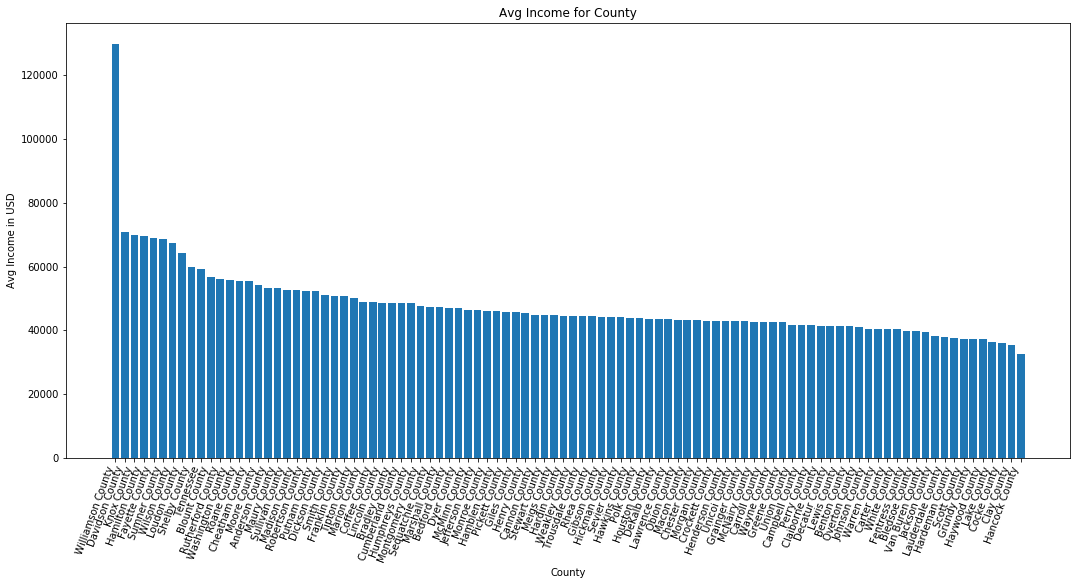

In [1078]:
#sorting first by what we want to plot (average income)
income_county_agg = income_county_agg.sort_values(by = "avg_income", ascending=False)

plt.figure(figsize=(18,8))
plt.bar("county", "avg_income", data = income_county_agg)
plt.xticks(rotation = 70, ha= "right")
plt.title("Avg Income for County")
plt.xlabel("County")
plt.ylabel("Avg Income in USD")
plt.show()

# Plot costs for heat attack or cancer per county

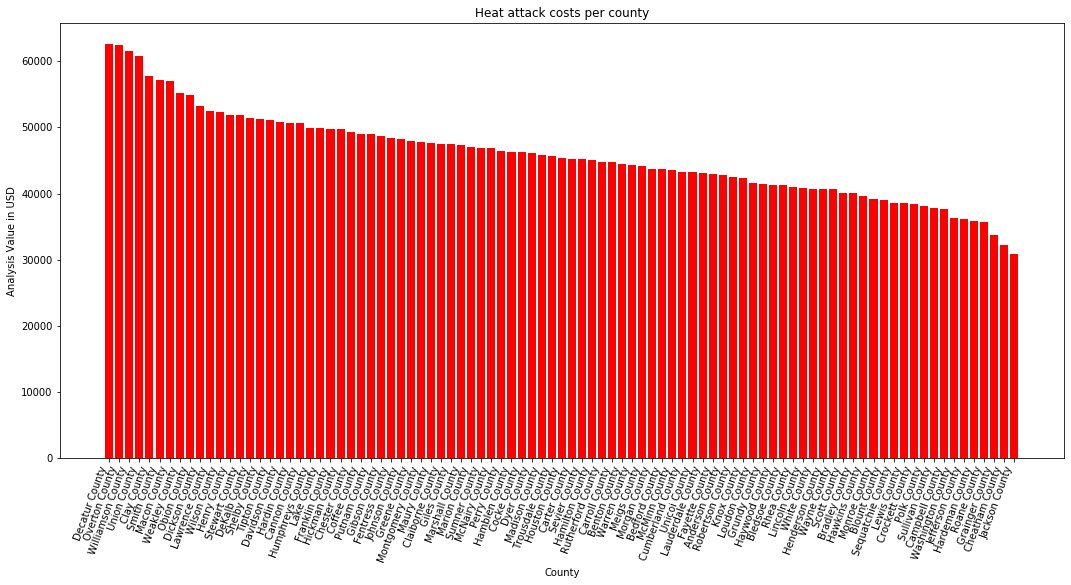

In [1079]:
ha_costs_df_onlyTN = ha_costs_df_onlyTN.sort_values(by = "analysis_value", ascending = False)

plt.figure(figsize=(18,8))
plt.bar("county", "analysis_value", data = ha_costs_df_onlyTN, color= "red")
plt.xticks(rotation = 70, ha= "right")
plt.title("Heat attack costs per county")
plt.xlabel("County")
plt.ylabel("Analysis Value in USD")
plt.show()

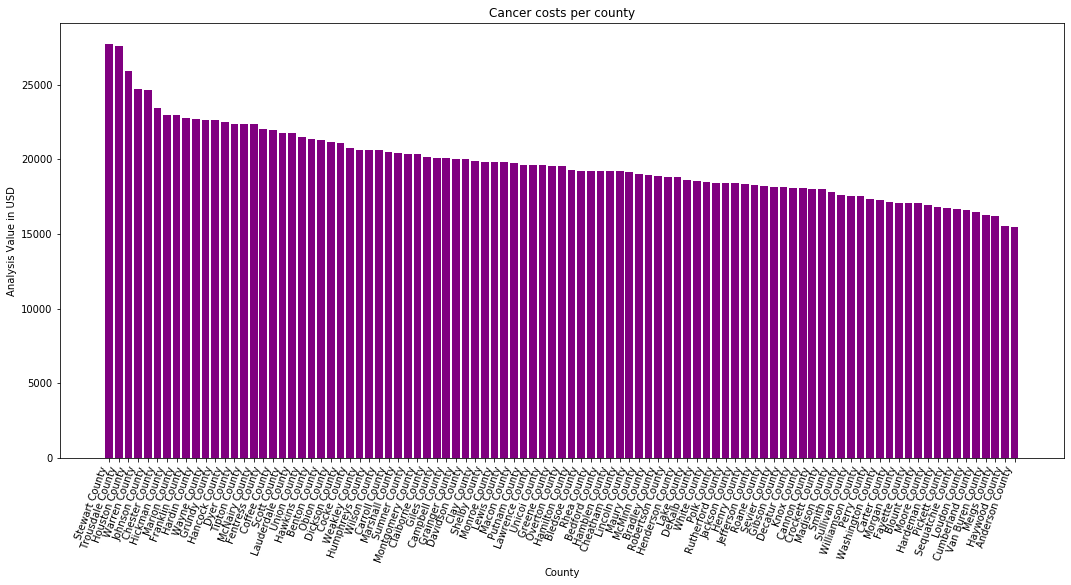

In [1080]:
cancer_costs_df_OnlyTN = cancer_costs_df_OnlyTN.sort_values(by = "analysis_value", ascending = False)

plt.figure(figsize=(18,8))
plt.bar("county", "analysis_value", data = cancer_costs_df_OnlyTN, color= "purple")
plt.xticks(rotation = 70, ha= "right")
plt.title("Cancer costs per county")
plt.xlabel("County")
plt.ylabel("Analysis Value in USD")
plt.show()

# Keep only required columns: costs, income and county

In [1081]:
income_county_agg_2 = income_county_agg[["county", "avg_income"]]
income_county_agg_2.head()

,county,avg_income
94,Williamson County,129769.0
18,Davidson County,70778.0
46,Knox County,69939.0
32,Hamilton County,69608.0
23,Fayette County,68950.0


In [1082]:
ha_costs_df_onlyTN_2 = ha_costs_df_onlyTN[["county", "urban", "analysis_value"]]
ha_costs_df_onlyTN_2.head()

,county,urban,analysis_value
2049,Decatur County,Rural,62641
2094,Overton County,Rural,62486
2119,Williamson County,Urban,61541
2113,Union County,Urban,60785
2043,Clay County,Rural,57705


In [1083]:
cancer_costs_df_OnlyTN_2 = cancer_costs_df_OnlyTN[["county", "urban", "analysis_value"]]
cancer_costs_df_OnlyTN_2.head()

,county,urban,analysis_value
2476,Stewart County,Urban,27740
2480,Trousdale County,Urban,27602
2437,Houston County,Rural,25909
2484,Warren County,Rural,24699
2441,Johnson County,Rural,24647


# Merge Costs from Heart attack or Cancer data with Income data

In [1084]:
ha_income_2_merged = pd.merge(ha_costs_df_onlyTN_2, income_county_agg_2, on = "county", how = "left")
ha_income_2_merged.head()

,county,urban,analysis_value,avg_income
0,Decatur County,Rural,62641,41330.0
1,Overton County,Rural,62486,40962.0
2,Williamson County,Urban,61541,129769.0
3,Union County,Urban,60785,41821.0
4,Clay County,Rural,57705,35424.0


In [1085]:
cancer_income_2_merged = pd.merge(cancer_costs_df_OnlyTN_2, income_county_agg_2, on = "county", how = "left")
cancer_income_2_merged.head()

,county,urban,analysis_value,avg_income
0,Stewart County,Urban,27740,44939.0
1,Trousdale County,Urban,27602,44463.0
2,Houston County,Rural,25909,43649.0
3,Warren County,Rural,24699,40390.0
4,Johnson County,Rural,24647,40500.0


# Create new column comparing Costs with Income

In [1086]:
ha_income_2_merged["cost_income_ratio"] = ha_income_2_merged["analysis_value"] / ha_income_2_merged["avg_income"]

ha_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Decatur County,Rural,62641,41330.0,1.515630
1,Overton County,Rural,62486,40962.0,1.525463
2,Williamson County,Urban,61541,129769.0,0.474235
3,Union County,Urban,60785,41821.0,1.453456
4,Clay County,Rural,57705,35424.0,1.628980


In [1087]:
ha_income_2_merged.describe()

,analysis_value,avg_income,cost_income_ratio
count,91.000000,91.000000,91.000000
mean,45762.989011,47874.252747,0.990191
std,6574.670462,11839.442264,0.215559
min,30831.000000,35424.000000,0.474235
25%,41105.500000,42161.000000,0.853859
50%,45384.000000,44527.000000,1.006337
75%,49698.500000,50338.500000,1.122572
max,62641.000000,129769.000000,1.628980


In [1088]:
cancer_income_2_merged["cost_income_ratio"] = cancer_income_2_merged["analysis_value"] / cancer_income_2_merged["avg_income"]

cancer_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Stewart County,Urban,27740,44939.0,0.617281
1,Trousdale County,Urban,27602,44463.0,0.620786
2,Houston County,Rural,25909,43649.0,0.593576
3,Warren County,Rural,24699,40390.0,0.611513
4,Johnson County,Rural,24647,40500.0,0.608568


In [1089]:
cancer_income_2_merged.describe()

,analysis_value,avg_income,cost_income_ratio
count,95.000000,95.000000,95.000000
mean,19757.894737,47671.957895,0.432218
std,2436.304533,11741.990528,0.097560
min,15454.000000,32573.000000,0.135063
25%,18103.500000,41817.000000,0.364157
50%,19563.000000,44527.000000,0.430877
75%,21153.000000,50338.500000,0.483406
max,27740.000000,129769.000000,0.691217


# Compare Urban and Rural for cost income ratio for both Heart Attack and Cancer Data

In [1090]:
urban_ha_income_2_merged = ha_income_2_merged.loc[ha_income_2_merged["urban"] == "Urban"].sort_values(by = "cost_income_ratio", ascending = False)
urban_ha_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
3,Union County,Urban,60785,41821.0,1.453456
6,Macon County,Urban,57048,43220.0,1.319944
13,Stewart County,Urban,51882,44939.0,1.154498
24,Chester County,Urban,49264,43147.0,1.141771
19,Cannon County,Urban,50604,44955.0,1.125659


In [1091]:
rural_ha_income_2_merged = ha_income_2_merged.loc[ha_income_2_merged["urban"] == "Rural"].sort_values(by = "cost_income_ratio", ascending = False)
rural_ha_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
4,Clay County,Rural,57705,35424.0,1.628980
1,Overton County,Rural,62486,40962.0,1.525463
0,Decatur County,Rural,62641,41330.0,1.515630
21,Lake County,Rural,49875,36437.0,1.368801
41,Cocke County,Rural,46292,36106.0,1.282114


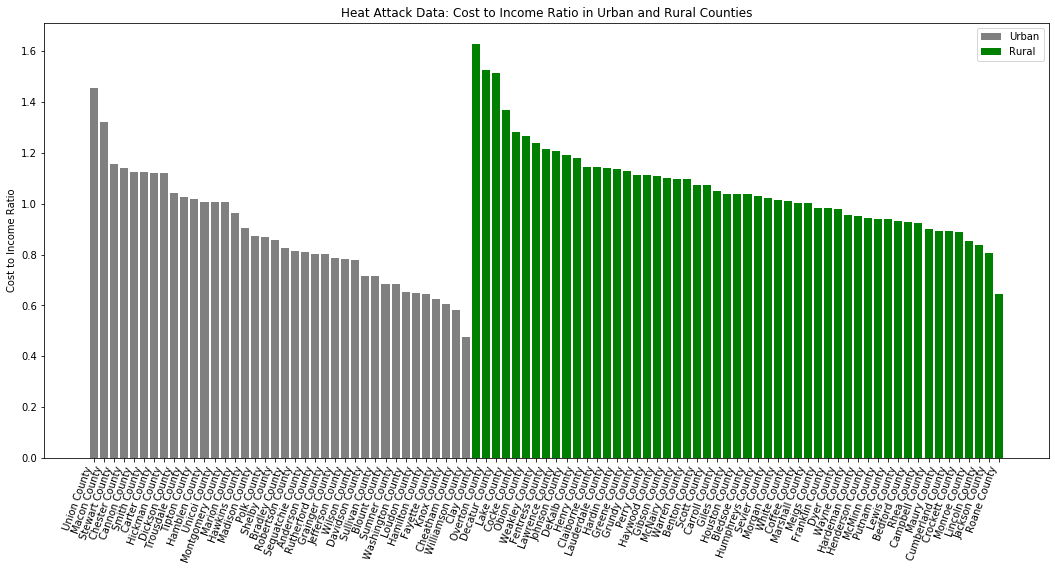

In [1092]:
plt.figure(figsize=(18, 8))
plt.bar("county", "cost_income_ratio", data = urban_ha_income_2_merged, color = "grey", label = "Urban")
plt.bar("county", "cost_income_ratio", data = rural_ha_income_2_merged, color = "green", label = "Rural")
plt.xticks(rotation = 70, ha= "right")
plt.ylabel("Cost to Income Ratio")
plt.legend()
plt.title("Heat Attack Data: Cost to Income Ratio in Urban and Rural Counties")
plt.show()

In [1093]:
import seaborn as sns

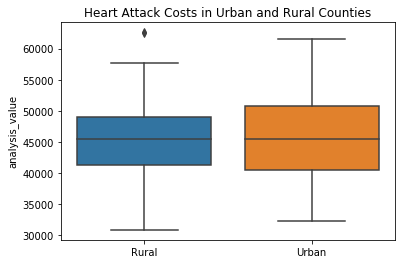

In [1094]:
sns.boxplot(y=ha_income_2_merged.analysis_value, x = ha_income_2_merged.urban)
plt.title("Heart Attack Costs in Urban and Rural Counties")
plt.xlabel("")
plt.show()

In [1095]:
urban_cancer_income_2_merged = cancer_income_2_merged.loc[cancer_income_2_merged["urban"] == "Urban"].sort_values(by = "cost_income_ratio", ascending = False)
urban_cancer_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
1,Trousdale County,Urban,27602,44463.0,0.620786
0,Stewart County,Urban,27740,44939.0,0.617281
5,Chester County,Urban,23421,43147.0,0.542819
6,Hickman County,Urban,22996,44266.0,0.519496
20,Union County,Urban,21516,41821.0,0.514478


In [1096]:
rural_cancer_income_2_merged = cancer_income_2_merged.loc[cancer_income_2_merged["urban"] == "Rural"].sort_values(by = "cost_income_ratio", ascending = False)
rural_cancer_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
12,Hancock County,Rural,22515,32573.0,0.691217
3,Warren County,Rural,24699,40390.0,0.611513
4,Johnson County,Rural,24647,40500.0,0.608568
11,Grundy County,Rural,22627,37277.0,0.606996
2,Houston County,Rural,25909,43649.0,0.593576


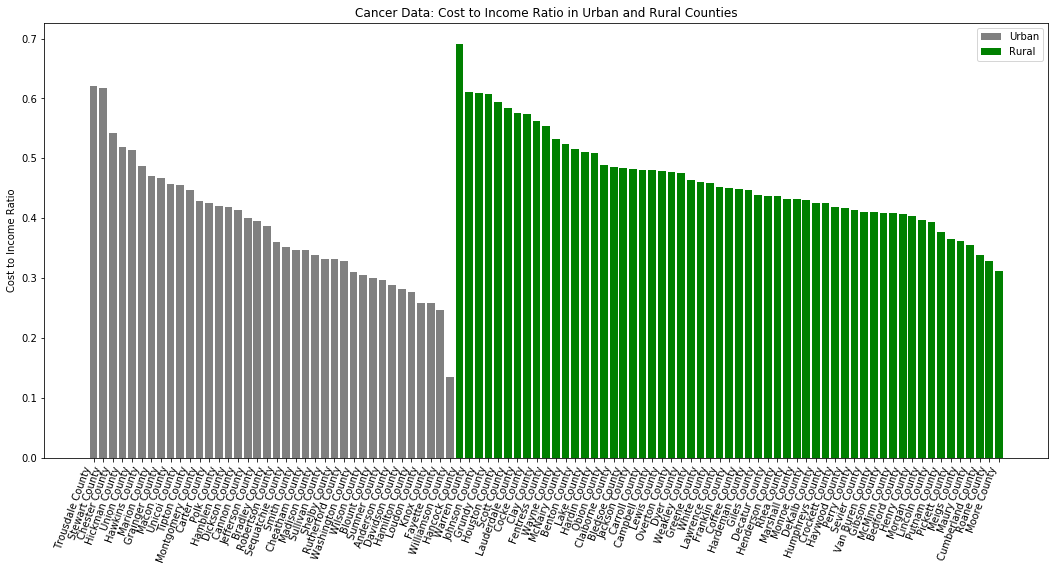

In [1097]:
plt.figure(figsize=(18, 8))
plt.bar("county", "cost_income_ratio", data = urban_cancer_income_2_merged, color = "grey", label = "Urban")
plt.bar("county", "cost_income_ratio", data = rural_cancer_income_2_merged, color = "green", label = "Rural")
plt.xticks(rotation = 70, ha= "right")
plt.ylabel("Cost to Income Ratio")
plt.legend()
plt.title("Cancer Data: Cost to Income Ratio in Urban and Rural Counties")
plt.show()

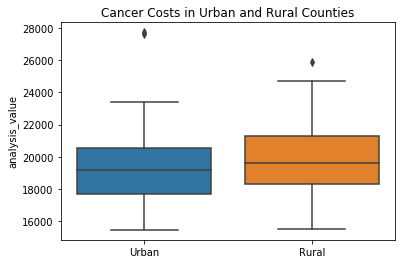

In [1098]:
sns.boxplot(y=cancer_income_2_merged.analysis_value, x = cancer_income_2_merged.urban)
plt.title("Cancer Costs in Urban and Rural Counties")
plt.xlabel("")
plt.show()

# Correlation of Costs between Heart Attack and Cancer Data

In [1099]:
len(ha_income_2_merged)

91

In [1100]:
len(cancer_income_2_merged)

95

In [1101]:
counties_NOTcommon_ha_cancer = cancer_income_2_merged.loc[~cancer_income_2_merged.county.isin(ha_income_2_merged.county)]
counties_NOTcommon_ha_cancer

,county,urban,analysis_value,avg_income,cost_income_ratio
12,Hancock County,Rural,22515,32573.0,0.691217
85,Moore County,Rural,16978,54317.0,0.312572
87,Pickett County,Rural,16768,45798.0,0.366130
91,Van Buren County,Rural,16244,39591.0,0.410295


In [1102]:
droppedUncommonCounties_cancer_3 = cancer_income_2_merged.drop(index=[12, 85, 87, 91])
droppedUncommonCounties_cancer_3.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Stewart County,Urban,27740,44939.0,0.617281
1,Trousdale County,Urban,27602,44463.0,0.620786
2,Houston County,Rural,25909,43649.0,0.593576
3,Warren County,Rural,24699,40390.0,0.611513
4,Johnson County,Rural,24647,40500.0,0.608568


In [1103]:
len(droppedUncommonCounties_cancer_3)

91

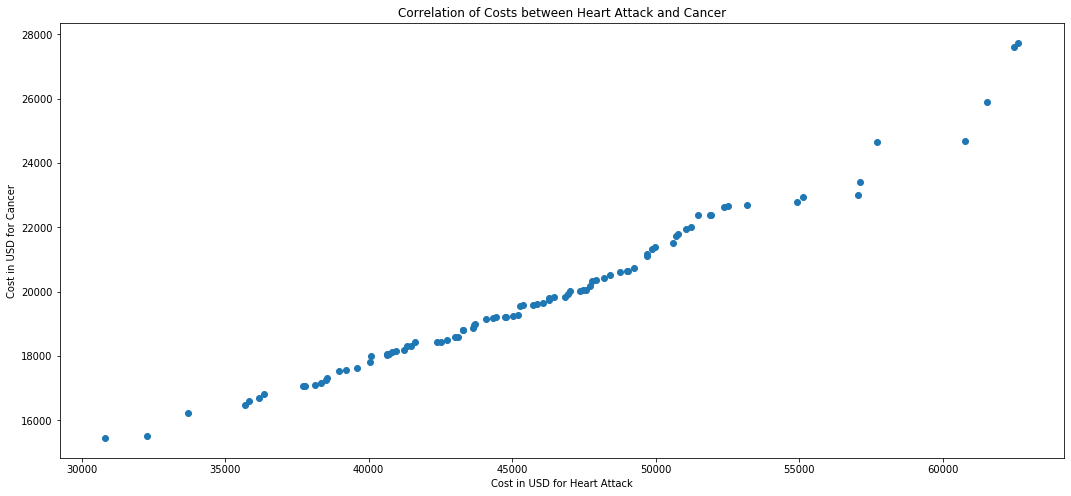

In [1104]:
plt.figure(figsize=(18, 8))
plt.scatter(ha_income_2_merged.analysis_value, droppedUncommonCounties_cancer_3.analysis_value)
plt.xlabel("Cost in USD for Heart Attack")
plt.ylabel("Cost in USD for Cancer")
plt.title("Correlation of Costs between Heart Attack and Cancer")
plt.show()

# Choropleth Map

In [1105]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize 

In [1106]:
counties = gpd.read_file("/Users/nehasawhney/desktop/PROJECT_DSEmodule/data/county/tn_counties.shp")

In [1107]:
counties.head()

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry
0,0.128263,1.518444,2,77,59,Stewart,TN,"POLYGON ((1364976.405478028 793944.5740065643,..."
1,0.124217,1.750500,3,81,62,Robertson,TN,"POLYGON ((1641280.781373917 842367.2746404002,..."
2,0.141647,1.975747,4,82,64,Sumner,TN,"POLYGON ((1802978.842360515 837772.8471861221,..."
3,0.141815,1.769964,5,84,60,Montgomery,TN,"POLYGON ((1485935.933511378 842978.4805909351,..."
4,0.079980,1.244972,6,15,71,Macon,TN,"POLYGON ((1908481.094009018 839761.3791088989,..."


In [1108]:
counties.crs

{'init': 'epsg:2274'}

In [1109]:
counties = counties.to_crs(epsg = 4326)
counties.crs

{'init': 'epsg:4326', 'no_defs': True}

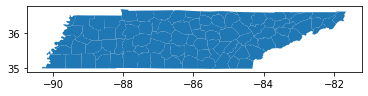

In [1110]:
counties.plot();

## Map the counties with a  qualitative color map

In [1111]:
# Column = "COUNTY" paraeter was not included in the code below as it was giving an error. 
# See Week 4 Review that shows " counties.plot(ax = ax, column = 'NAME', cmap = 'Set3') " 
# where NAME is same as COUNTY

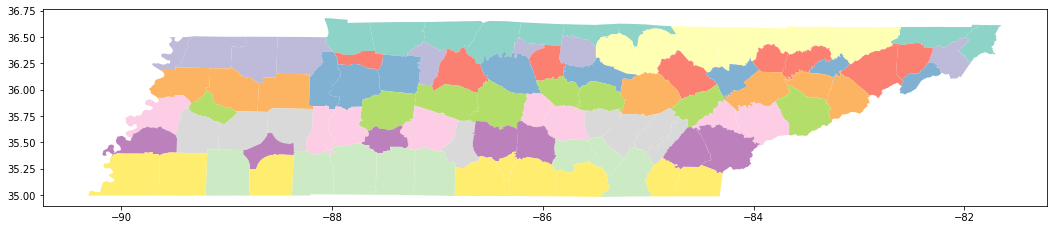

In [1112]:
fig, ax = plt.subplots(figsize = (18, 8))
counties.plot(ax = ax, cmap = "Set3");

# Choropleth for Heart Attack Data

In [1113]:
ha_income_2_merged.county.str[:].head()

0       Decatur County
1       Overton County
2    Williamson County
3         Union County
4          Clay County
Name: county, dtype: object

In [1114]:
# drop the word "County" from the cancer data using string slicing
ha_income_2_merged.county = ha_income_2_merged.county.str[:-7]
ha_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Decatur,Rural,62641,41330.0,1.515630
1,Overton,Rural,62486,40962.0,1.525463
2,Williamson,Urban,61541,129769.0,0.474235
3,Union,Urban,60785,41821.0,1.453456
4,Clay,Rural,57705,35424.0,1.628980


# Merge Heart Attack Data with Geo Data

In [1115]:
# now we merge, making sure the counties GeoDataFrame is on the left so our result is a GeoDataFrame
geo_ha = pd.merge(counties, ha_income_2_merged, left_on = "COUNTY", right_on = "county")
geo_ha.head(2)

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry,county,urban,analysis_value,avg_income,cost_income_ratio
0,0.128263,1.518444,2,77,59,Stewart,TN,POLYGON ((-88.05330657958983 36.49701690673763...,Stewart,Urban,51882,44939.0,1.154498
1,0.124217,1.750500,3,81,62,Robertson,TN,POLYGON ((-87.11525726318359 36.64228439330988...,Robertson,Urban,42519,52259.0,0.813621


### Construct choropleth of Heart Attack cost/income ratios
#Steps (from week 4 review notebook)
 - Set up a normalized _sequential_ color map for our chorlopleth
 - define the fig and ax
 - create a divider for the colorbar (because the default legend is wacky)
 - draw the map

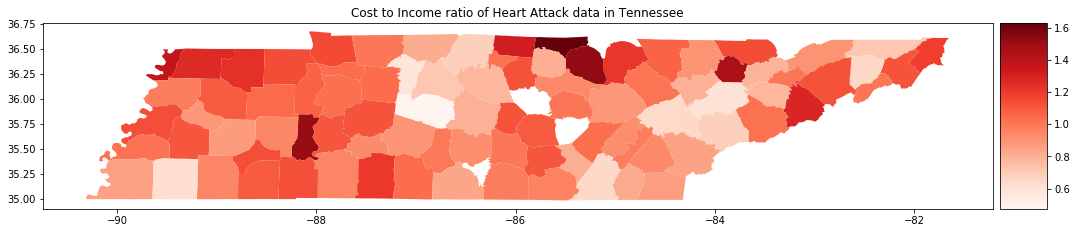

In [1116]:
cmap = cm.ScalarMappable(
    norm = Normalize(geo_ha.cost_income_ratio.min(), geo_ha.cost_income_ratio.max()),
    cmap = "Reds")
cmap.set_array([]) 

fig, ax = plt.subplots (figsize = (18, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_ha.plot(ax=ax, column = "cost_income_ratio", cmap = "Reds")
ax.set_title("Cost to Income ratio of Heart Attack data in Tennessee");

# Choropleth for Cancer Data

In [1117]:
cancer_income_2_merged.county.str[:].head()

0      Stewart County
1    Trousdale County
2      Houston County
3       Warren County
4      Johnson County
Name: county, dtype: object

In [1118]:
# drop the word "County" from the cancer data using string slicing
cancer_income_2_merged.county = cancer_income_2_merged.county.str[:-7]
cancer_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Stewart,Urban,27740,44939.0,0.617281
1,Trousdale,Urban,27602,44463.0,0.620786
2,Houston,Rural,25909,43649.0,0.593576
3,Warren,Rural,24699,40390.0,0.611513
4,Johnson,Rural,24647,40500.0,0.608568


## Merge Cancer Data with Geo Data

In [1119]:
# now we merge, making sure the counties GeoDataFrame is on the left so our result is a GeoDataFrame
geo_cancer = pd.merge(counties, cancer_income_2_merged, left_on = "COUNTY", right_on = "county")
geo_cancer.head(2)

,AREA,PERIMETER,TNCODD_,TNCODD_ID,INDEX_NO,COUNTY,STATE,geometry,county,urban,analysis_value,avg_income,cost_income_ratio
0,0.128263,1.518444,2,77,59,Stewart,TN,POLYGON ((-88.05330657958983 36.49701690673763...,Stewart,Urban,27740,44939.0,0.617281
1,0.124217,1.750500,3,81,62,Robertson,TN,POLYGON ((-87.11525726318359 36.64228439330988...,Robertson,Urban,18809,52259.0,0.359919


## Construct choropleth of Cancer cost/income ratios
#Steps (from week 4 review notebook)
 - Set up a normalized _sequential_ color map for our chorlopleth
 - define the fig and ax
 - create a divider for the colorbar (because the default legend is wacky)
 - draw the map

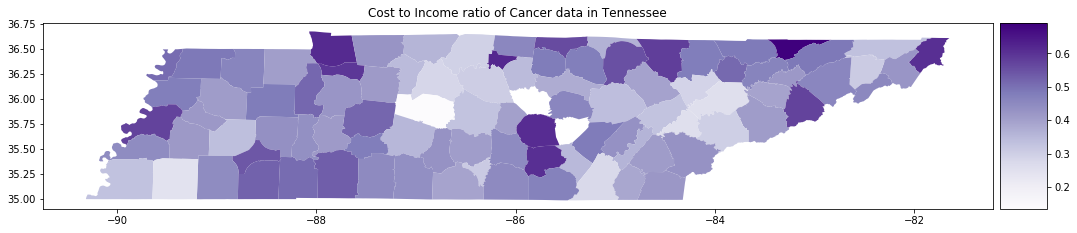

In [1120]:
cmap = cm.ScalarMappable(
    norm = Normalize(geo_cancer.cost_income_ratio.min(), geo_cancer.cost_income_ratio.max()),
    cmap = "Purples")
cmap.set_array([]) 

fig, ax = plt.subplots (figsize = (18, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(mappable=cmap, cax = cax)
geo_cancer.plot(ax=ax, column = "cost_income_ratio", cmap = "Purples")
ax.set_title("Cost to Income ratio of Cancer data in Tennessee");

# Building logistic regression model to predict if a county’s cost-income ratio (for heart attack dataset) is above or below the mean for Tennessee

#### logistic regression model for HA costs

- create target column (1 for cost-income ratio above the mean 0 if at or below the mean)
- encode the urban column
- split train/test
- use urban column to predict

In [1121]:
ha_income_2_merged.head(2)

,county,urban,analysis_value,avg_income,cost_income_ratio
0,Decatur,Rural,62641,41330.0,1.515630
1,Overton,Rural,62486,40962.0,1.525463


In [1122]:
ha_cost_income_ratio_mean = ha_income_2_merged.cost_income_ratio.mean()
ha_cost_income_ratio_mean

0.9901914475509055

In [1123]:
# create target variable
ha_income_2_merged["cost_income_ratio_above_mean"] = [1 if ratio > ha_cost_income_ratio_mean 
                                                      else 0 for ratio in ha_income_2_merged.cost_income_ratio]

In [1124]:
ha_income_2_merged.head()

,county,urban,analysis_value,avg_income,cost_income_ratio,cost_income_ratio_above_mean
0,Decatur,Rural,62641,41330.0,1.515630,1
1,Overton,Rural,62486,40962.0,1.525463,1
2,Williamson,Urban,61541,129769.0,0.474235,0
3,Union,Urban,60785,41821.0,1.453456,1
4,Clay,Rural,57705,35424.0,1.628980,1


In [1125]:
ha_income_2_merged.cost_income_ratio_above_mean.value_counts(normalize = True)

1    0.527473
0    0.472527
Name: cost_income_ratio_above_mean, dtype: float64

In [1126]:
# 52% counties have cost-income ratio above mean

In [1127]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

#### Convert explanatory variables to encode categorical values / encode the urban column

In [1128]:
ha_income_3_encode = pd.get_dummies(ha_income_2_merged, columns = ["urban"], drop_first = True)
ha_income_3_encode.head()

,county,analysis_value,avg_income,cost_income_ratio,cost_income_ratio_above_mean,urban_Urban
0,Decatur,62641,41330.0,1.515630,1,0
1,Overton,62486,40962.0,1.525463,1,0
2,Williamson,61541,129769.0,0.474235,0,1
3,Union,60785,41821.0,1.453456,1,1
4,Clay,57705,35424.0,1.628980,1,0


#### Use Urban/Rural feature to predict if cost income ratio is above mean

In [1129]:
ha_x = ha_income_3_encode[["urban_Urban"]]
ha_y = ha_income_3_encode.cost_income_ratio_above_mean

In [1130]:
ha_x_train, ha_x_test, ha_y_train, ha_y_test = train_test_split(ha_x, ha_y, random_state = 100)

In [1131]:
ha_x_train.head(2)

,urban_Urban
3,1
40,1


In [1132]:
ha_x_test.head(2)

,urban_Urban
57,0
61,1


In [1133]:
ha_y_train.head(2)

3     1
40    1
Name: cost_income_ratio_above_mean, dtype: int64

In [1134]:
ha_y_test.head(2)

57    0
61    0
Name: cost_income_ratio_above_mean, dtype: int64

In [1135]:
ha_logistic_model = LogisticRegression()

In [1136]:
ha_logistic_model.fit(ha_x_train, ha_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1137]:
ha_logistic_model.coef_[0]

array([-0.97421077])

In [1138]:
list(ha_x.columns)

['urban_Urban']

In [1139]:
ha_y_pred = ha_logistic_model.predict(ha_x_test)

In [1140]:
ha_y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0])

In [1141]:
print(metrics.accuracy_score(ha_y_test, ha_y_pred))

0.5652173913043478


In [1142]:
# 56% accuracy in model

In [1143]:
# the previous naive model (predicting the cost-income ratio above the mean for all cases) would have accuracy 52%

In [1144]:
print('                 Pred Below Mean:  Pred Above Mean:')
print('    Actual Below Mean:    ', metrics.confusion_matrix(ha_y_test, ha_y_pred)[0])
print('    Actual Above Mean:   ', metrics.confusion_matrix(ha_y_test, ha_y_pred)[1])

                 Pred Below Mean:  Pred Above Mean:
    Actual Below Mean:     [7 6]
    Actual Above Mean:    [4 6]


In [1145]:
ha_y_pred_prob = ha_logistic_model.predict_proba(ha_x_test)[:,1]
print('Area Under Curve:', metrics.roc_auc_score(ha_y_test, ha_y_pred_prob))

Area Under Curve: 0.5692307692307692


# Use other potential features that might explain cost disparities. 
#### Find additional data that may improve the classifier
#### Example: Number of healthcare providers in a county, the number of healthcare facilities in a county, unemployment rates, or the per-person-income (which can be approximated using the number of exemptions in the IRS data) are potential features. 
#### Some other features include obseity, age, tabaccoo smoking habits, mortality, etc.

In [1146]:
tn_health_rankings_obesity_smoke = pd.read_excel("/Users/nehasawhney/desktop/PROJECT_DSEmodule/data/2019 County Health Rankings Tennessee Data - v1_0.xls", 
                                sheet_name = "Obesity and Smoking_Project",
                               header = [0,1])

In [1147]:
tn_health_rankings_obesity_smoke.head()

,Unnamed: 0_level_0,Adult obesity,Adult smoking
,County,% Obese,% Smokers
0,NaN,33.0,22.087808
1,Anderson,32.1,20.712385
2,Bedford,32.7,21.397061
3,Benton,34.6,22.664481
4,Bledsoe,34.8,25.607088


In [1148]:
list(tn_health_rankings_obesity_smoke.columns)

[('Unnamed: 0_level_0', 'County'),
 ('Adult obesity', '% Obese'),
 ('Adult smoking', '% Smokers')]

#### Cleaning data

In [1149]:
tn_health_rankings_obesity_smoke.columns = ["county", "obese_percentage", "smoke_percentage"]

In [1150]:
tn_health_rankings_obesity_smoke.head()

,county,obese_percentage,smoke_percentage
0,NaN,33.0,22.087808
1,Anderson,32.1,20.712385
2,Bedford,32.7,21.397061
3,Benton,34.6,22.664481
4,Bledsoe,34.8,25.607088


In [1151]:
tn_health_rankings_obesity_smoke.isnull().sum()

county              1
obese_percentage    0
smoke_percentage    0
dtype: int64

In [1152]:
tn_health_rankings_obesity_smoke = tn_health_rankings_obesity_smoke.dropna(subset=["county"])

In [1153]:
tn_health_rankings_obesity_smoke.head()

,county,obese_percentage,smoke_percentage
1,Anderson,32.1,20.712385
2,Bedford,32.7,21.397061
3,Benton,34.6,22.664481
4,Bledsoe,34.8,25.607088
5,Blount,34.6,19.058731


In [1154]:
tn_health_rankings_obesity_smoke.isnull().sum()

county              0
obese_percentage    0
smoke_percentage    0
dtype: int64

In [1155]:
ha_income_3_encode.head()

,county,analysis_value,avg_income,cost_income_ratio,cost_income_ratio_above_mean,urban_Urban
0,Decatur,62641,41330.0,1.515630,1,0
1,Overton,62486,40962.0,1.525463,1,0
2,Williamson,61541,129769.0,0.474235,0,1
3,Union,60785,41821.0,1.453456,1,1
4,Clay,57705,35424.0,1.628980,1,0


#### Merging new data with existing dataset 

In [1156]:
ha_income_obesity_smoke_4 = pd.merge(ha_income_3_encode, tn_health_rankings_obesity_smoke, 
                               on = "county", how= "left")

In [1157]:
ha_income_obesity_smoke_4.head()

,county,analysis_value,avg_income,cost_income_ratio,cost_income_ratio_above_mean,urban_Urban,obese_percentage,smoke_percentage
0,Decatur,62641,41330.0,1.515630,1,0,33.1,21.248911
1,Overton,62486,40962.0,1.525463,1,0,35.7,23.815873
2,Williamson,61541,129769.0,0.474235,0,1,25.2,15.178397
3,Union,60785,41821.0,1.453456,1,1,35.6,23.498382
4,Clay,57705,35424.0,1.628980,1,0,30.9,25.245029


#### Creating target column 

In [1158]:
obesity_mean = ha_income_obesity_smoke_4.obese_percentage.mean()
obesity_mean

33.44725274725275

In [1159]:
ha_income_obesity_smoke_4["obesity_above_mean"] = [1 if obesity > obesity_mean 
                                                      else 0 for obesity 
                                             in ha_income_obesity_smoke_4.obese_percentage]

In [1160]:
ha_income_obesity_smoke_4.head()

,county,analysis_value,avg_income,cost_income_ratio,cost_income_ratio_above_mean,urban_Urban,obese_percentage,smoke_percentage,obesity_above_mean
0,Decatur,62641,41330.0,1.515630,1,0,33.1,21.248911,0
1,Overton,62486,40962.0,1.525463,1,0,35.7,23.815873,1
2,Williamson,61541,129769.0,0.474235,0,1,25.2,15.178397,0
3,Union,60785,41821.0,1.453456,1,1,35.6,23.498382,1
4,Clay,57705,35424.0,1.628980,1,0,30.9,25.245029,0


#### Use "obesity above mean" feature to predict if cost income ratio is above mean

In [1161]:
ha_x = ha_income_obesity_smoke_4[["obesity_above_mean", "smoke_percentage"]]
ha_y = ha_income_obesity_smoke_4.cost_income_ratio_above_mean

### Using Logistic Regression Model

In [1162]:
ha_x_train, ha_x_test, ha_y_train, ha_y_test = train_test_split(ha_x, ha_y, random_state = 100)

In [1163]:
ha_x_train.head(2)

,obesity_above_mean,smoke_percentage
3,1,23.498382
40,0,23.645515


In [1164]:
ha_x_test.head(2)

,obesity_above_mean,smoke_percentage
57,0,19.562027
61,0,20.712385


In [1165]:
ha_y_train.head(2)

3     1
40    1
Name: cost_income_ratio_above_mean, dtype: int64

In [1166]:
ha_y_test.head(2)

57    0
61    0
Name: cost_income_ratio_above_mean, dtype: int64

In [1167]:
ha_obesity_logistic_model = LogisticRegression()

In [1168]:
ha_obesity_logistic_model.fit(ha_x_train, ha_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Training data performance 

In [1169]:
ha_y_pred_train = ha_obesity_logistic_model.predict(ha_x_train)
print(metrics.accuracy_score(ha_y_train, ha_y_pred_train))

0.6029411764705882


#### Testing data performance 

In [1170]:
ha_y_pred_test = ha_obesity_logistic_model.predict(ha_x_test)
print(metrics.accuracy_score(ha_y_test, ha_y_pred_test))

0.5217391304347826


In [1171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

### Using Decision Tree Model

In [1172]:
# Start by building a single decision tree classifier.

In [1173]:
ha_tree = DecisionTreeClassifier()
ha_tree.fit(ha_x_train, ha_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Training data performance 

In [1174]:
ha_y_pred_train = ha_tree.predict(ha_x_train)
print(metrics.accuracy_score(ha_y_train, ha_y_pred_train))

1.0


#### Testing data performace 

In [1175]:
ha_y_pred_test = ha_tree.predict(ha_x_test)
print(metrics.accuracy_score(ha_y_test, ha_y_pred_test))

0.6086956521739131


#### Using Forest Classifier Model 

In [1176]:
ha_forest = RandomForestClassifier()
ha_forest.fit(ha_x_train, ha_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Training data performace 

In [1177]:
ha_y_pred_train = ha_forest.predict(ha_x_train)
print(metrics.accuracy_score(ha_y_train, ha_y_pred_train))

0.9117647058823529


#### Testing data performace 

In [1178]:
ha_y_pred_test = ha_forest.predict(ha_x_test)
print(metrics.accuracy_score(ha_y_test, ha_y_pred_test))

0.5652173913043478


### Using Random Forest Model with Hyperparameters 

In [1179]:
ha_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 4, min_samples_leaf = 10)
ha_forest.fit(ha_x_train, ha_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Training data performance 

In [1180]:
ha_y_pred_train = ha_forest.predict(ha_x_train)
print(metrics.accuracy_score(ha_y_train, ha_y_pred_train))

0.6470588235294118


#### Testing data performance 

In [1181]:
ha_y_pred_test = ha_forest.predict(ha_x_test)
print(metrics.accuracy_score(ha_y_test, ha_y_pred_test))

0.6956521739130435


# Plotting importance of features

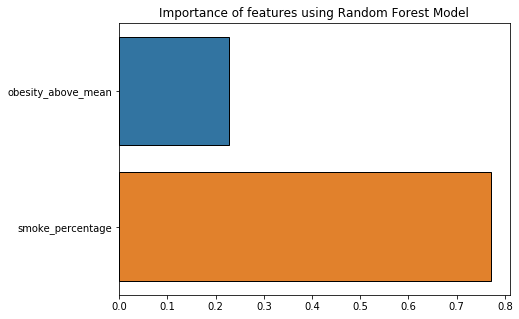

In [1182]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(x = ha_forest.feature_importances_, y = list(ha_x.columns), ax = ax, edgecolor = 'black')
plt.title('Importance of features using Random Forest Model');